<a href="https://colab.research.google.com/github/Ostrich2002/SRiSHTi23/blob/main/SRiSHTi'23_assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

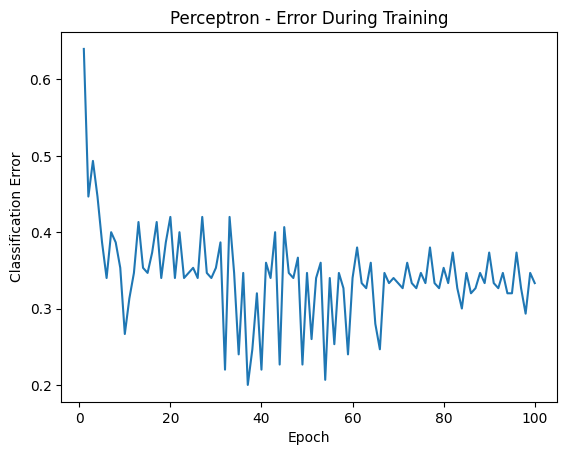

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data[:, :2]  # Take only the first two features for visualization
y = data.target

# Initialize the Perceptron classifier
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)

# Train the Perceptron classifier
errors = []
for _ in range(perceptron.max_iter):
    perceptron.partial_fit(X, y, classes=np.unique(y))
    errors.append(1 - accuracy_score(y, perceptron.predict(X)))

# Plot the error during training
plt.plot(range(1, perceptron.max_iter + 1), errors)
plt.xlabel('Epoch')
plt.ylabel('Classification Error')
plt.title('Perceptron - Error During Training')
plt.show()


Effect of Learning Rate (eta) on Convergence:

When the learning rate is too high (e.g., eta = 1), the perceptron algorithm may fail to converge. It can oscillate around the optimal solution or even diverge.
Increasing the learning rate can cause larger weight updates at each iteration, leading to overshooting the optimal solution.
Decreasing the learning rate can slow down convergence but may help the algorithm to converge to a more accurate solution.


Importance of Learning Rate:
The learning rate is a hyperparameter that controls the step size of weight updates during training.
A suitable learning rate is crucial for achieving good performance in machine learning algorithms.
Setting an appropriate learning rate can help balance the convergence speed and the quality of the learned solution.
It is often necessary to experiment with different learning rates to find the optimal value for a given problem.

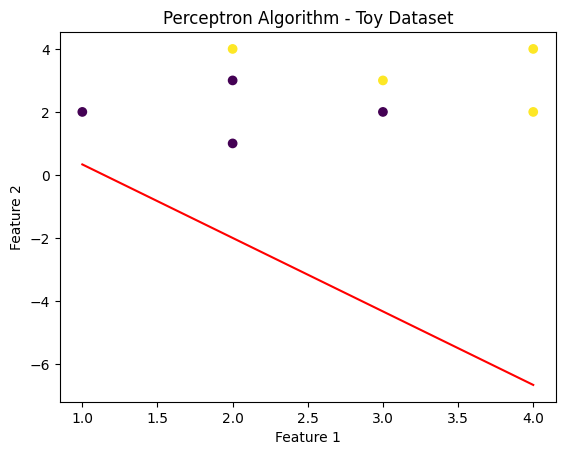

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Toy dataset
X = np.array([[1, 2], [2, 1], [2, 3], [3, 2], [4, 2], [2, 4], [3, 3], [4, 4]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0
eta = 1  # Learning rate
epochs = 10

# Perceptron algorithm
for _ in range(epochs):
    misclassified = 0
    for xi, target in zip(X, y):
        if target * (np.dot(xi, w) + b) <= 0:
            w += eta * target * xi
            b += eta * target
            misclassified += 1
    if misclassified == 0:
        break

# Plotting the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
x_boundary = np.linspace(1, 4, 100)
y_boundary = -(w[0] * x_boundary + b) / w[1]
plt.plot(x_boundary, y_boundary, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Algorithm - Toy Dataset')
plt.show()


Perceptron on a Non-Linearly Separable Dataset:

The perceptron algorithm is a linear classifier and works best when the data is linearly separable.
When the dataset is not linearly separable, the perceptron algorithm may not converge or produce suboptimal results.
In such cases, the decision boundary of the perceptron will not be able to separate the classes accurately.

Yes, the perceptron learning algorithm can be extended to classify more than two classes using a method called "One-vs-All" or "One-vs-Rest" (OvR) approach.

In the OvR approach, we train multiple binary classifiers, where each classifier is trained to distinguish one class from the rest of the classes. During the prediction phase, we run all the classifiers on a test instance and assign the class label of the classifier with the highest output.


In [4]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, max_epochs=100):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        self.classes = None

    def train(self, X, y):
        self.classes = np.unique(y)
        self.weights = np.zeros((len(self.classes), X.shape[1]))
        self.bias = np.zeros(len(self.classes))

        for class_index, class_label in enumerate(self.classes):
            y_binary = np.where(y == class_label, 1, -1)
            weights_class = self.weights[class_index]
            bias_class = self.bias[class_index]

            for _ in range(self.max_epochs):
                misclassified = 0
                for xi, target in zip(X, y_binary):
                    if target * (np.dot(xi, weights_class) + bias_class) <= 0:
                        weights_class += self.learning_rate * target * xi
                        bias_class += self.learning_rate * target
                        misclassified += 1
                if misclassified == 0:
                    break

    def predict(self, X):
        predictions = []
        for xi in X:
            outputs = []
            for weights_class, bias_class in zip(self.weights, self.bias):
                output = np.dot(xi, weights_class) + bias_class
                outputs.append(output)
            predicted_class = self.classes[np.argmax(outputs)]
            predictions.append(predicted_class)
        return predictions
